# Face Detection Using Viola-Jones (Test)

In [29]:
import numpy as np
import cv2

face_cascade = cv2.CascadeClassifier(cv2.haarcascades + "haarcascade_frontalface_default.xml")
# print(face_cascade.empty())
img = cv2.imread('yalefaces2/subject01.gif.jpg')
# print(img.shape)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
face_cascade.empty()

False

In [30]:

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
print(faces)
for (x,y,w,h) in faces:
    img = cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
cv2.imshow('img',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

[[111  66 153 153]]


# Rename Images from GIF to JPG

In [ ]:
import os 
  
for count, filename in enumerate(os.listdir("yalefaces/")): 
    dst = "yalefaces/" + filename + ".jpg"
    src = "yalefaces/" + filename 
#     dst = 'xyz'+ dst  
    os.rename(src, dst)
#     print(dst, src)
#     break
# os.listdir('yalefaces/')

# Converting GIF to JPG

In [24]:
from PIL import Image
import os 
for count, filename in enumerate(os.listdir("yalefaces/")):
    if ".info" in filename or ".csv" in filename or filename == "Dockerfile":
        continue
    else:
        im1 = Image.open("yalefaces/"+filename)
        im1.save("yalefaces2/"+filename)

# Training our own HaarCascade Classifier (Test)

In [1]:
import pandas as pd
import numpy as np

In [19]:
df_faces = pd.read_csv("yalefaces/yalefaces.csv", names = ["Label","x","y","w","h","Path","W","H"])
df_faces["No. of Faces"] = [1]*df_faces.shape[0]
hc_df = df_faces[["Path","No. of Faces","x","y","w","h"]]
hc_df

Path  No. of Faces    x   y    w    h
0            subject01.gif.jpg             1  105  38  160  198
1    subject01.glasses.gif.jpg             1  107  47  149  188
2        subject01.glasses.jpg             1  107  41  149  195
3          subject01.happy.jpg             1  106  47  151  190
4      subject01.leftlight.jpg             1  104  51  162  181
..                         ...           ...  ...  ..  ...  ...
161   subject15.rightlight.jpg             1   94  78  161  164
162          subject15.sad.jpg             1   89  67  167  167
163       subject15.sleepy.jpg             1   83  57  167  174
164    subject15.surprised.jpg             1   69  54  180  189
165         subject15.wink.jpg             1   88  72  175  159

[166 rows x 6 columns]

In [45]:
np.savetxt("yalefaces/yalefaces.info", hc_df.values, fmt='%s %d %d %d %d %d')

In [55]:
cv2.__version__

'4.4.0'

Matplotlib is building the font cache; this may take a moment.


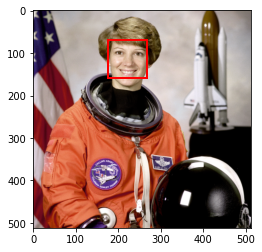

In [2]:
from skimage import data
from skimage.feature import Cascade

import matplotlib.pyplot as plt
from matplotlib import patches

# Load the trained file from the module root.
trained_file = data.lbp_frontal_face_cascade_filename()

# Initialize the detector cascade.
detector = Cascade(trained_file)

img = data.astronaut()

detected = detector.detect_multi_scale(img=img,
                                       scale_factor=1.2,
                                       step_ratio=1,
                                       min_size=(60, 60),
                                       max_size=(123, 123))

plt.imshow(img)
img_desc = plt.gca()
plt.set_cmap('gray')

for patch in detected:

    img_desc.add_patch(
        patches.Rectangle(
            (patch['c'], patch['r']),
            patch['width'],
            patch['height'],
            fill=False,
            color='r',
            linewidth=2
        )
    )

plt.show()

In [4]:
import cv2
help(cv2.HOGDescriptor().detectMultiScale)

Help on built-in function detectMultiScale:

detectMultiScale(...) method of cv2.HOGDescriptor instance
    detectMultiScale(img[, hitThreshold[, winStride[, padding[, scale[, finalThreshold[, useMeanshiftGrouping]]]]]]) -> foundLocations, foundWeights
    .   @brief Detects objects of different sizes in the input image. The detected objects are returned as a list
    .       of rectangles.
    .       @param img Matrix of the type CV_8U or CV_8UC3 containing an image where objects are detected.
    .       @param foundLocations Vector of rectangles where each rectangle contains the detected object.
    .       @param foundWeights Vector that will contain confidence values for each detected object.
    .       @param hitThreshold Threshold for the distance between features and SVM classifying plane.
    .       Usually it is 0 and should be specified in the detector coefficients (as the last free coefficient).
    .       But if the free coefficient is omitted (which is allowed), you c

In [6]:
import cv2

In [11]:
image = cv2.imread("yalefaces2/subject01.gif.jpg")
cv2.imshow("image", image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [13]:
image = cv2.rectangle(image, (0,0), (8,8),(0,255,0),3)
image = cv2.rectangle(image, (188,36), (40,80),(0,255,0),3)

In [14]:
cv2.imshow("image", image)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Viola Jones + Eigen Faces (PCA) (OpenCV)

## Detecting Face Using Viola Jones

In [4]:
import numpy as np
import cv2

face_cascade = cv2.CascadeClassifier(cv2.haarcascades + "haarcascade_frontalface_default.xml")
# print(face_cascade.empty())
img = cv2.imread('yalefaces2/subject05.sad.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# face_cascade.empty()

In [5]:
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
print(faces)
for (x,y,w,h) in faces:
    img = cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
cv2.imshow('img',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

[[101  50 165 165]]


## Algorithm training using EigenFaces

##### References --> 
##### 1.) https://www.geeksforgeeks.org/ml-face-recognition-using-eigenfaces-pca-algorithm/
##### 2.) https://www.youtube.com/watch?v=5HNr_j6LmPc

In [37]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
face_cascade = cv2.CascadeClassifier(cv2.haarcascades + "haarcascade_frontalface_default.xml")

images = []
ndim = (40,40)
df_faces = pd.read_csv("yalefaces/yalefaces.csv", names = ["Label","x","y","w","h","Path","W","H"])
images_paths = df_faces["Path"].values
Labels = df_faces['Label'].values
for count , image_path in enumerate(images_paths):
    img = cv2.imread("yalefaces2/" + image_path, cv2.IMREAD_GRAYSCALE)
    faces = face_cascade.detectMultiScale(img, 1.3, 5)
    if faces != () :
        x,y,w,h = faces[0][0], faces[0][1], faces[0][2], faces[0][3]
        img = img[y:y+h, x:x+w]
#         img = cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
        img = cv2.resize(img, ndim)
        images.append(img.flatten())
    else:
        img = cv2.resize(img, ndim)
        images.append(img.flatten())
images = np.array(images).T # Shape of image vector = (40*40) x 166 [N^2 X M]

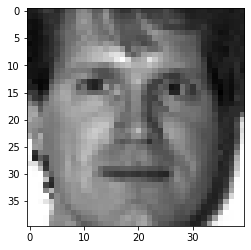

In [42]:
# Show First image
temp_image = A[:,0]
# print(temp_image.shape)
temp_image = np.reshape(temp_image, ndim)
plt.imshow(temp_image, cmap="gray")

In [115]:
X, Y = images, Labels
X.shape,Y.shape

((1600, 166), (166,))

In [116]:
import random
def shuffle_split(X, Y):
    no_for_test, no_for_train = [], []
    count = 0
    while count != 33:
        x = random.randint(0,165)
        if (x in no_for_test) or (x in no_for_train):
            continue
        else:
            no_for_test.append(x)
            count+=1
    count = 0
    while count!=133:
        x = random.randint(0,165)
        if (x in no_for_train) or (x in no_for_test):
            continue
        else:
            no_for_train.append(x)
            count+=1
    return X[:,no_for_train], Y[no_for_train], X[:,no_for_test], Y[no_for_test]

In [117]:
X_train, Y_train, X_test, Y_test = shuffle_split(X,Y)
# X_train, Y_train, X_test, Y_test

In [118]:
X_train.shape , Y_train.shape , X_test.shape, Y_test.shape

((1600, 133), (133,), (1600, 33), (33,))

In [119]:
avg_img_vec = (1/X_train.shape[1])*(np.sum(X_train, axis=1))
avg_img_vec = np.trunc(avg_img_vec)
temp_image = np.reshape(avg_img_vec, ndim)

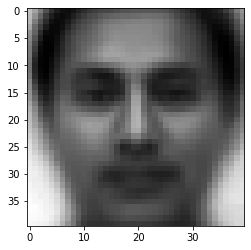

In [120]:
plt.imshow(temp_image, cmap="gray")

In [121]:
avg_faces = X_train - avg_img_vec.reshape(-1,1)

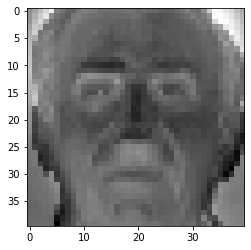

In [125]:
# Show Random image
temp_image = avg_faces[:,random.randint(0,132)]
# print(temp_image.shape)
temp_image = np.reshape(temp_image, ndim)
plt.imshow(temp_image, cmap="gray")

In [240]:
cov_mat = np.matmul(avg_faces.T, avg_faces)
cov_mat.shape

(133, 133)

In [236]:
from numpy import linalg
eig_values, eig_vectors = linalg.eig(cov_mat)
eig_values.shape, eig_vectors.shape
eig_values_sorted_indices = np.argsort(eig_values)

k = 100
sorted_eig_vecs = eig_vectors[eig_values_sorted_indices].real
top_eig_vec = sorted_eig_vecs[:,-k-1:-1].real
top_eig_vec.shape
avg_faces.shape

(1600, 133)

# Testing

In [43]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
face_cascade = cv2.CascadeClassifier(cv2.haarcascades + "haarcascade_frontalface_default.xml")

images = []
ndim = (40,40)
df_faces = pd.read_csv("yalefaces/yalefaces.csv", names = ["Label","x","y","w","h","Path","W","H"])
images_paths = df_faces["Path"].values
Labels = df_faces['Label'].values
for count , image_path in enumerate(images_paths):
    img = cv2.imread("yalefaces2/" + image_path, cv2.IMREAD_GRAYSCALE)
    faces = face_cascade.detectMultiScale(img, 1.3, 5)
    if faces != () :
        x,y,w,h = faces[0][0], faces[0][1], faces[0][2], faces[0][3]
        img = img[y:y+h, x:x+w]
#         img = cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
        img = cv2.resize(img, ndim)
        img = np.asarray(img,dtype=float)/255.0 
        images.append(img.flatten())
    else:
        img = cv2.resize(img, ndim)
        img = np.asarray(img,dtype=float)/255.0
        images.append(img.flatten())
flattened_images = images
# images = np.array(images).T # Shape of image vector = (40*40) x 166 [N^2 X M]
A_transpose = np.matrix(flattened_images)
A = np.transpose(A_transpose)

In [44]:
def griddisplay(image_list):
    fig1, axes_array = plt.subplots(5, 5)
    fig1.set_size_inches(5,5)
    k=0
    for row in range(5):
        for col in range(5):    
            im = cv2.resize(image_list[k],(100,100))
            image_plot = axes_array[row][col].imshow(im,cmap=plt.cm.gray) 
            axes_array[row][col].axis('off')
            k = k+1
    plt.show()

mean = np.mean(A, 1)

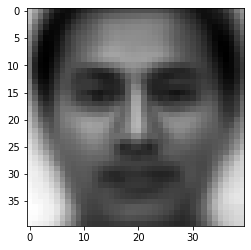

In [45]:
import matplotlib.pyplot as plt
temp_image = mean.reshape(40,40)
plt.imshow(temp_image, cmap = "gray")

In [46]:
zero_mean =[]
column =0
Zero_mean_matrix= np.ones((1600, 166))
for values in flattened_images:
    #zm = values-mean
    zm= A[:,column] - mean
    #print("z",zm.shape)
    zm = np.squeeze(zm)
    Zero_mean_matrix[:,column] =zm
    zm_images = zm.resize(40,40)
    zero_mean.append(zm)
    column = column +1

In [47]:
d = (np.dot(np.transpose(Zero_mean_matrix),Zero_mean_matrix))/40
u_list =[]
w2, v2 = np.linalg.eigh(d)

for ev in v2:
    ev_transpose = np.transpose(np.matrix(ev))
    u = np.dot(Zero_mean_matrix,ev_transpose)
    #norms = np.linalg.norm(u, axis=0)                           
    u = u / np.linalg.norm(u)
    #     minu = np.min(u)
    #     maxu = np.max(u)
    #     u = u-float(minu)
    #     u = u/float((maxu-minu)) 
    u_i= u.reshape(40,40)
    u_list.append(u_i)

		k=2


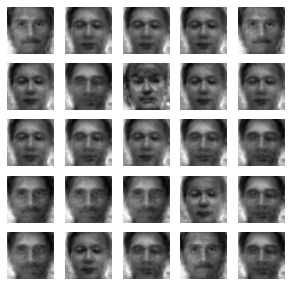

		k=5


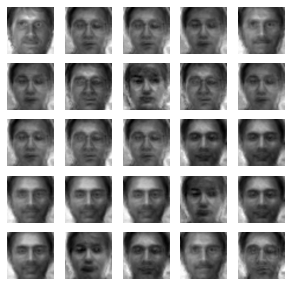

		k=15


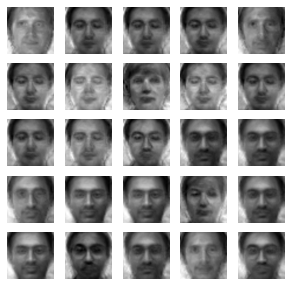

In [48]:
dict ={}
import scipy
def Reconstruct(k, boolean):
    weights=np.zeros((166,k))
    matrixU = np.zeros((1600,k))
    c =0
    for val in range(k-1,-1,-1):
        matrixU[:,c] = u_list[val].flatten()
        c = c+1
    rec_face=[]
    for face_num in range(0,166):
        w = np.dot(np.transpose(matrixU) ,Zero_mean_matrix[:,face_num])
        #w = Zero_mean_matrix[:,face_num]*np.transpose(matrixU)  
        weights[face_num,:] =w
        #face=np.zeros((1, 180625))
        #         face = np.dot(w[0], matrixU[:,0])
        #         for i in range(1,k):
        #             face = face + np.dot(w[i], matrixU[:,i])
        #         #print(face.shape)
        #         face = face+np.transpose(mean)

        face = np.dot(w, np.transpose(matrixU))
        minf = np.min(face)
        maxf = np.max(face)
        face = face-float(minf)
        face = face/float((maxf-minf))
        face = face+np.transpose(mean)
        reshape_face = face.reshape(40,40)
        rec_face.append( reshape_face)
    if boolean is True:
        griddisplay(rec_face)
    dict[k] = weights

print('\t\tk=2')
Reconstruct(2,True)
print('\t\tk=5')
Reconstruct(5,True)
print('\t\tk=15')
Reconstruct(15,True)


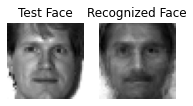

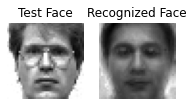

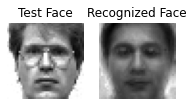

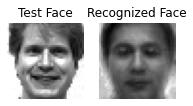

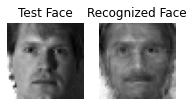

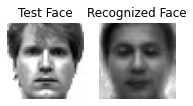

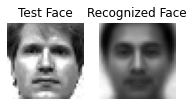

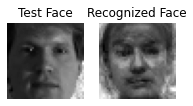

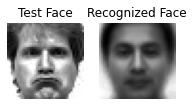

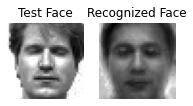

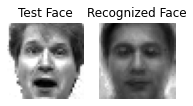

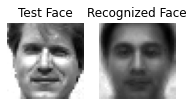

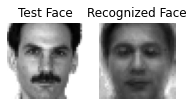

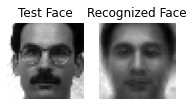

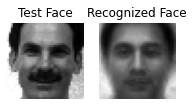

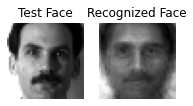

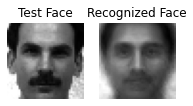

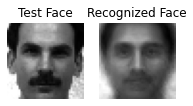

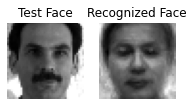

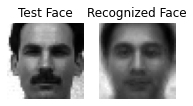

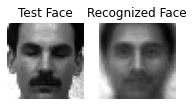

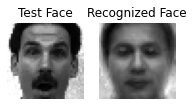

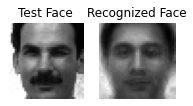

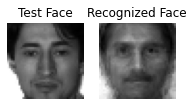

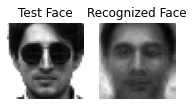

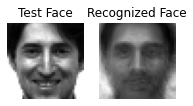

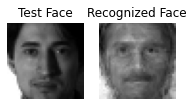

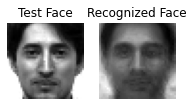

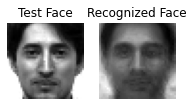

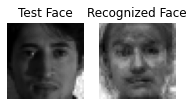

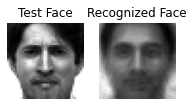

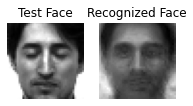

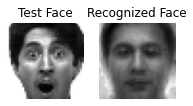

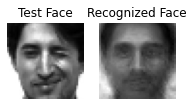

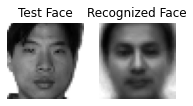

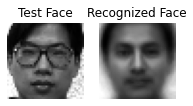

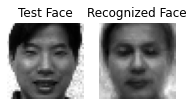

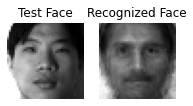

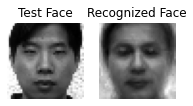

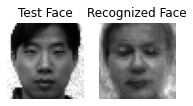

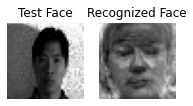

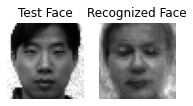

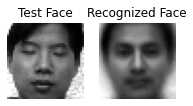

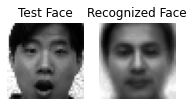

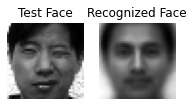

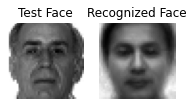

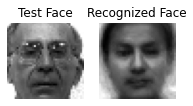

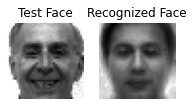

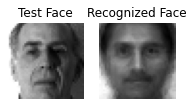

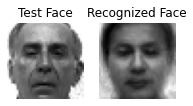

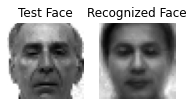

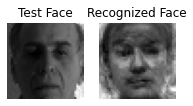

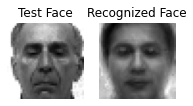

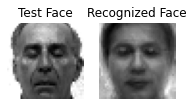

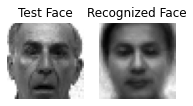

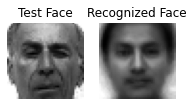

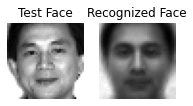

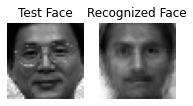

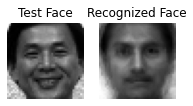

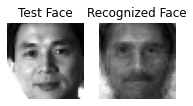

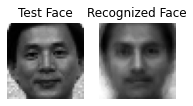

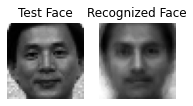

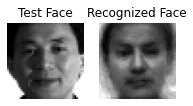

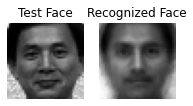

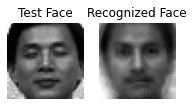

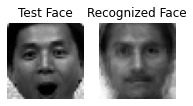

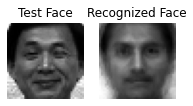

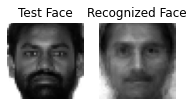

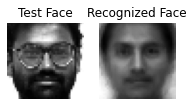

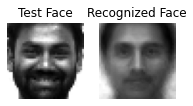

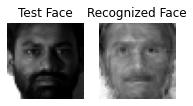

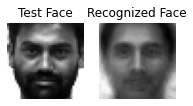

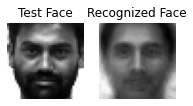

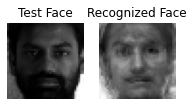

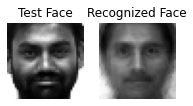

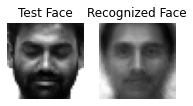

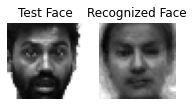

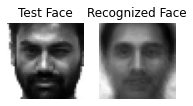

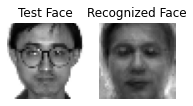

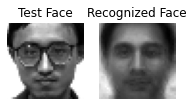

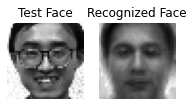

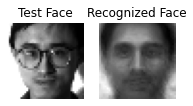

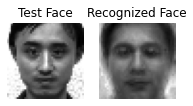

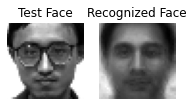

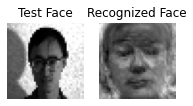

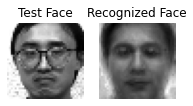

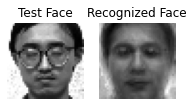

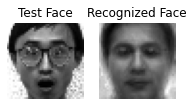

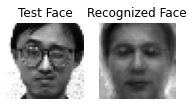

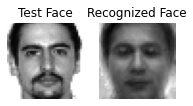

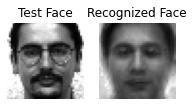

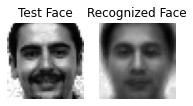

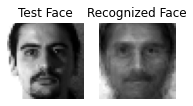

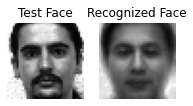

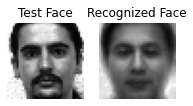

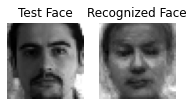

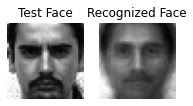

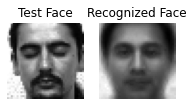

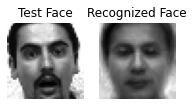

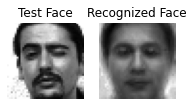

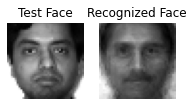

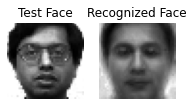

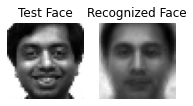

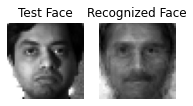

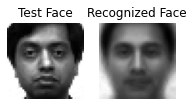

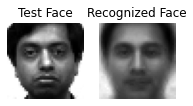

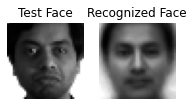

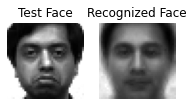

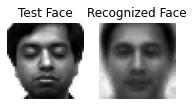

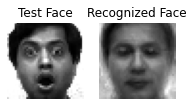

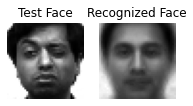

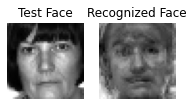

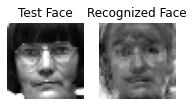

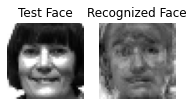

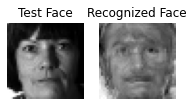

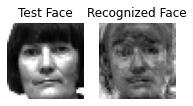

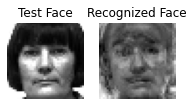

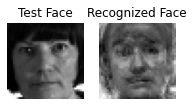

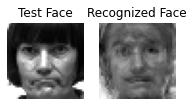

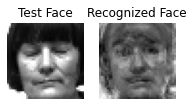

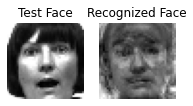

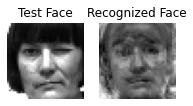

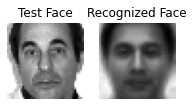

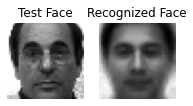

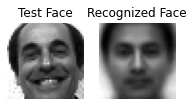

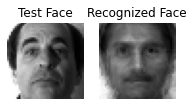

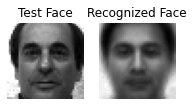

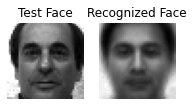

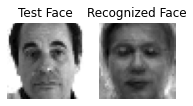

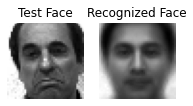

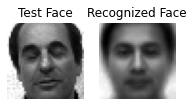

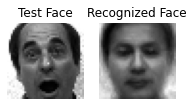

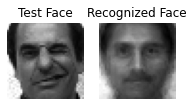

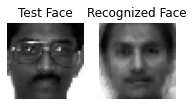

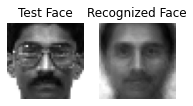

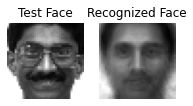

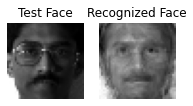

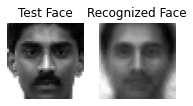

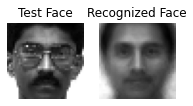

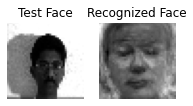

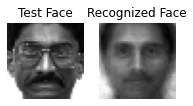

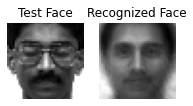

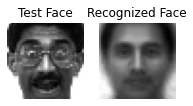

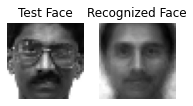

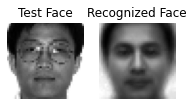

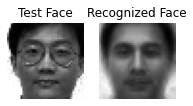

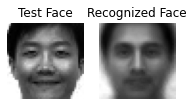

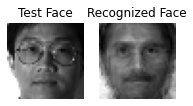

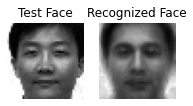

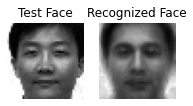

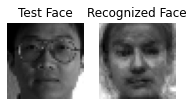

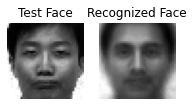

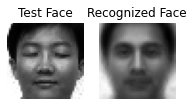

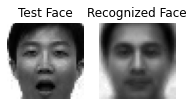

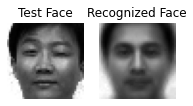

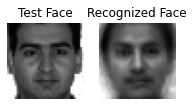

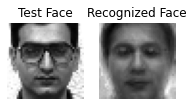

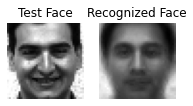

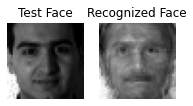

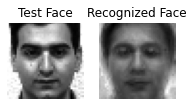

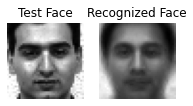

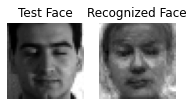

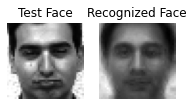

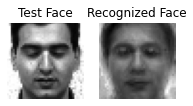

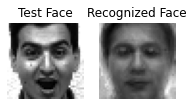

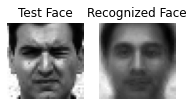

		k=5


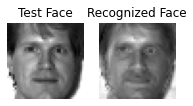

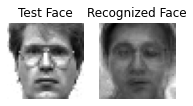

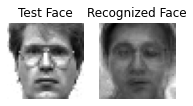

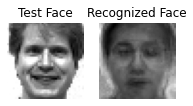

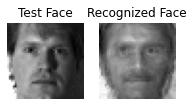

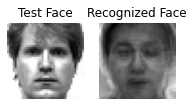

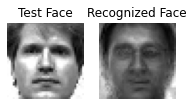

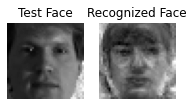

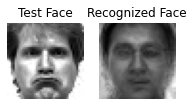

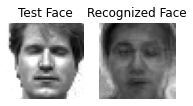

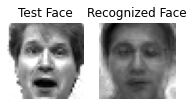

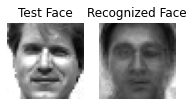

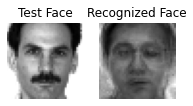

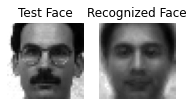

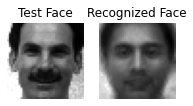

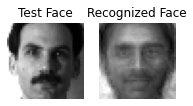

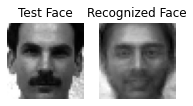

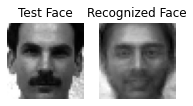

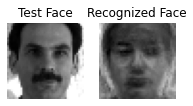

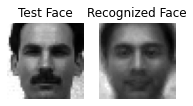

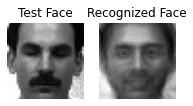

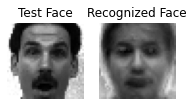

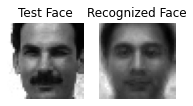

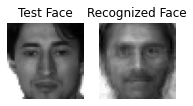

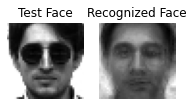

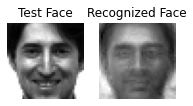

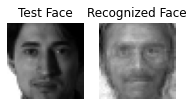

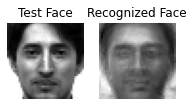

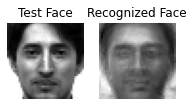

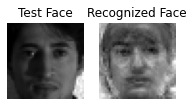

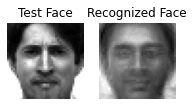

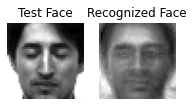

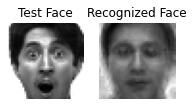

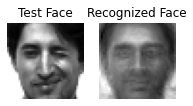

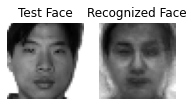

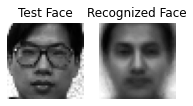

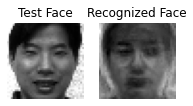

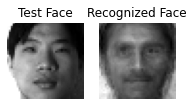

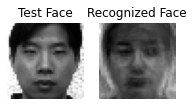

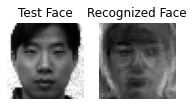

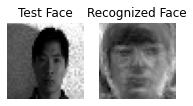

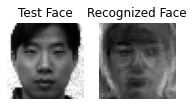

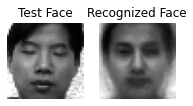

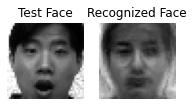

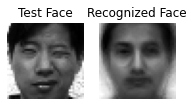

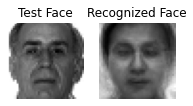

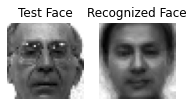

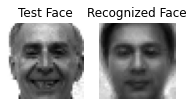

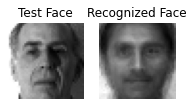

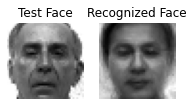

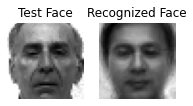

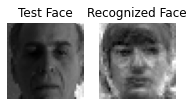

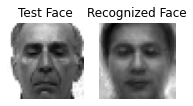

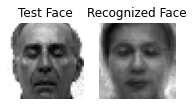

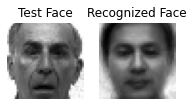

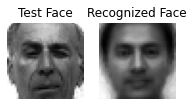

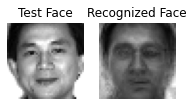

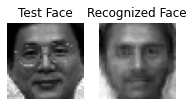

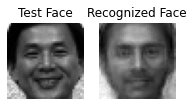

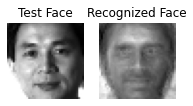

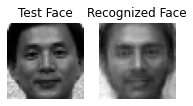

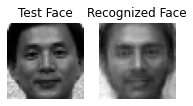

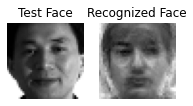

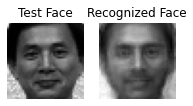

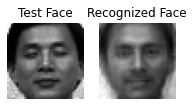

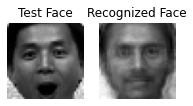

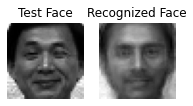

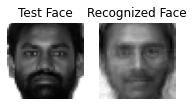

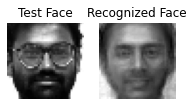

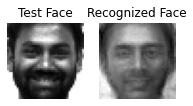

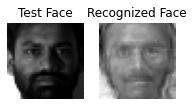

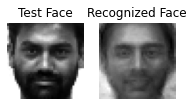

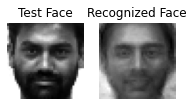

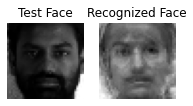

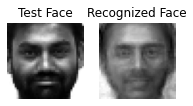

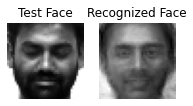

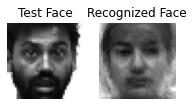

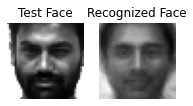

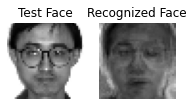

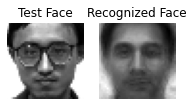

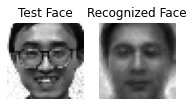

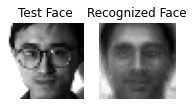

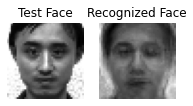

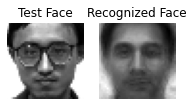

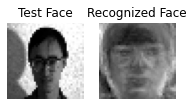

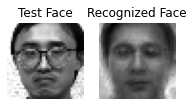

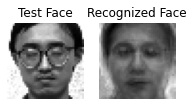

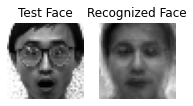

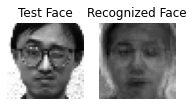

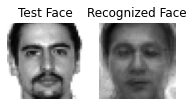

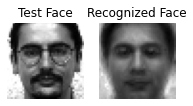

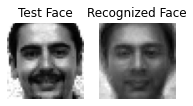

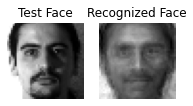

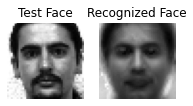

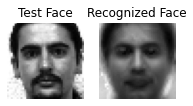

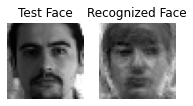

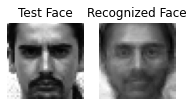

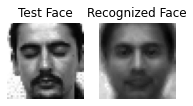

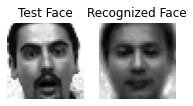

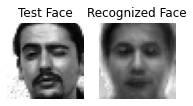

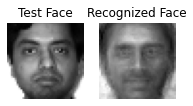

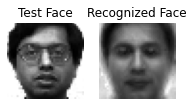

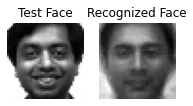

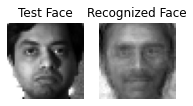

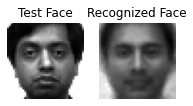

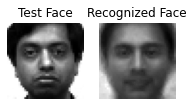

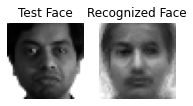

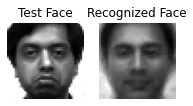

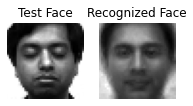

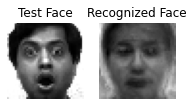

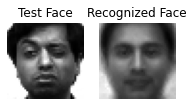

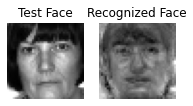

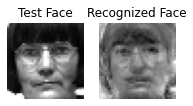

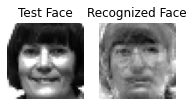

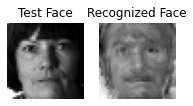

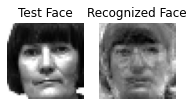

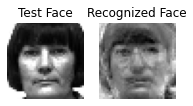

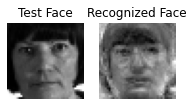

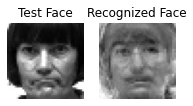

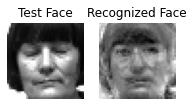

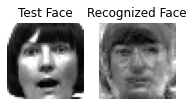

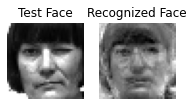

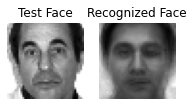

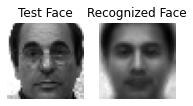

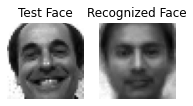

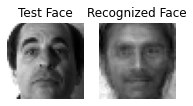

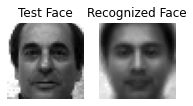

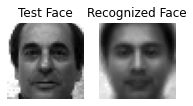

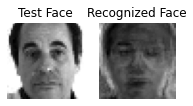

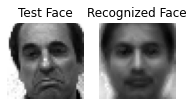

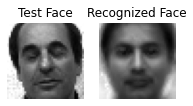

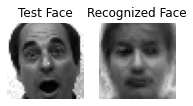

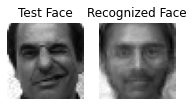

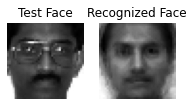

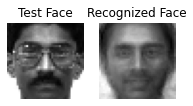

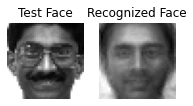

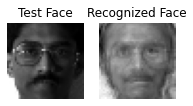

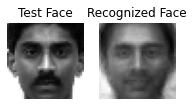

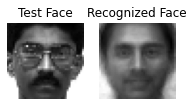

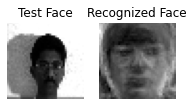

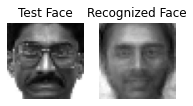

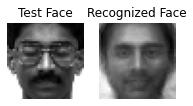

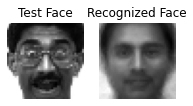

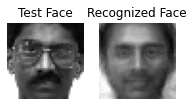

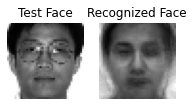

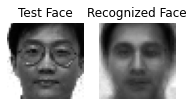

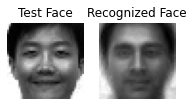

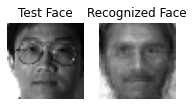

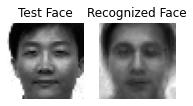

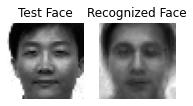

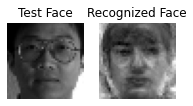

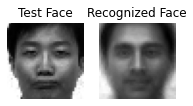

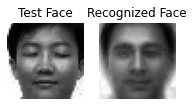

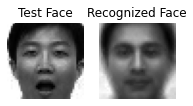

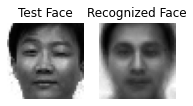

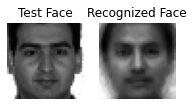

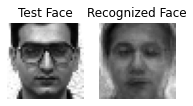

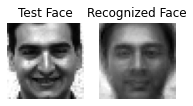

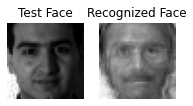

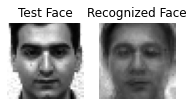

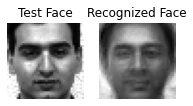

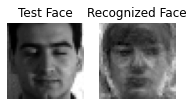

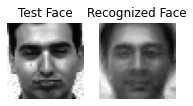

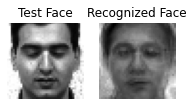

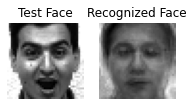

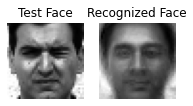

		k=15


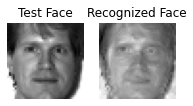

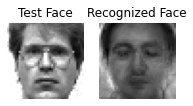

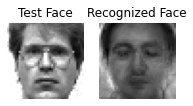

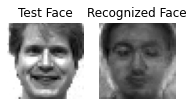

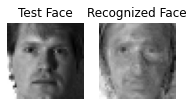

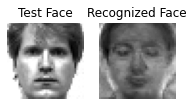

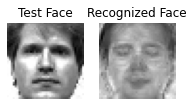

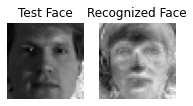

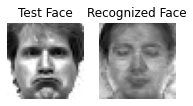

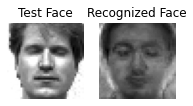

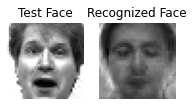

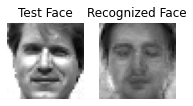

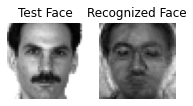

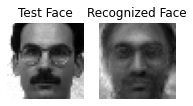

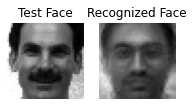

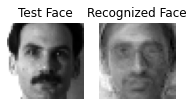

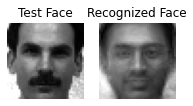

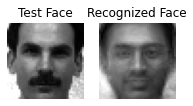

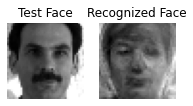

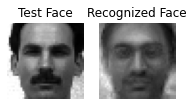

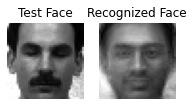

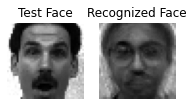

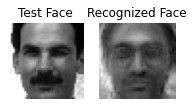

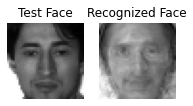

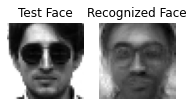

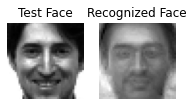

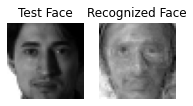

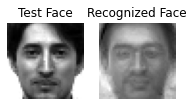

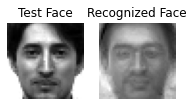

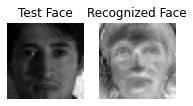

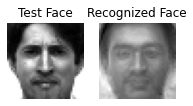

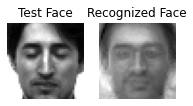

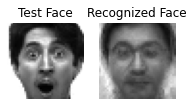

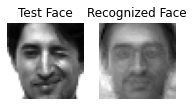

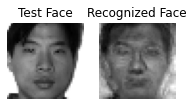

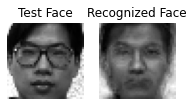

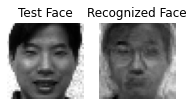

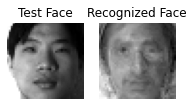

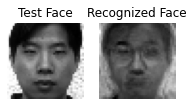

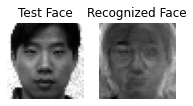

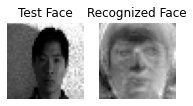

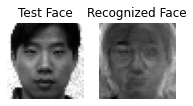

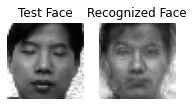

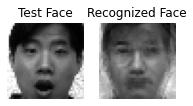

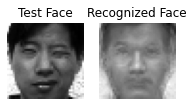

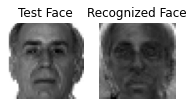

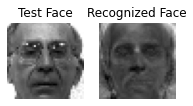

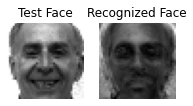

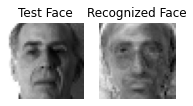

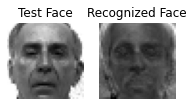

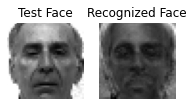

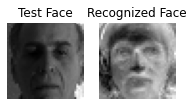

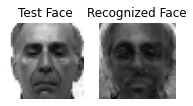

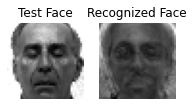

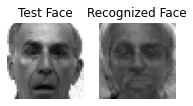

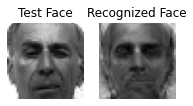

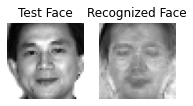

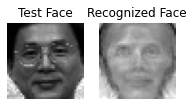

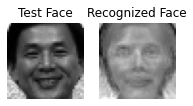

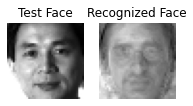

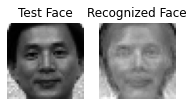

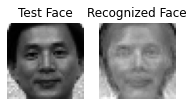

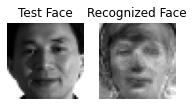

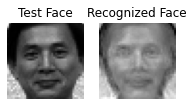

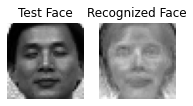

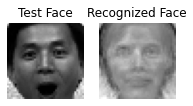

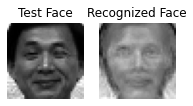

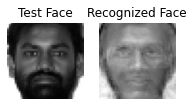

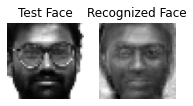

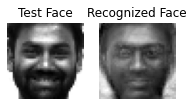

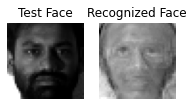

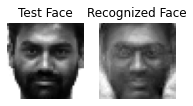

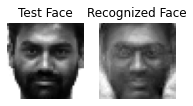

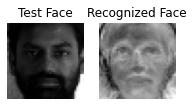

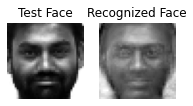

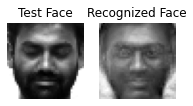

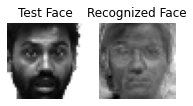

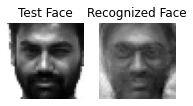

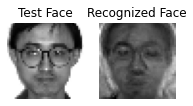

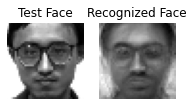

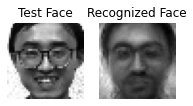

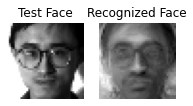

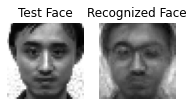

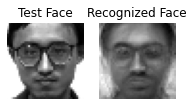

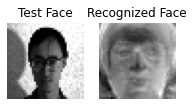

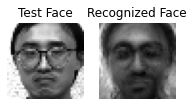

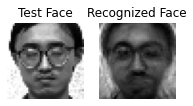

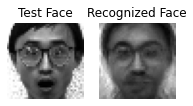

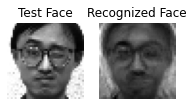

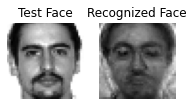

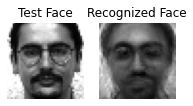

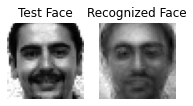

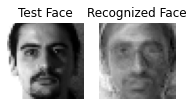

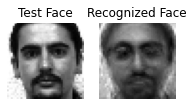

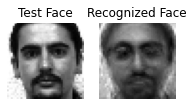

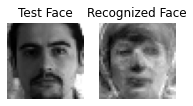

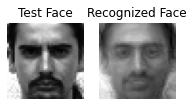

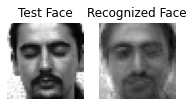

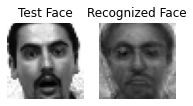

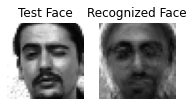

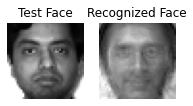

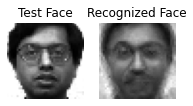

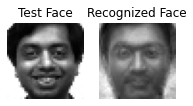

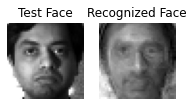

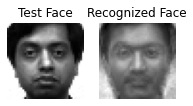

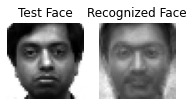

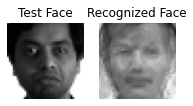

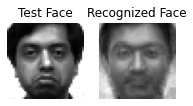

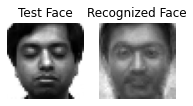

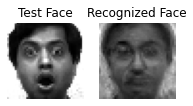

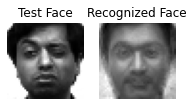

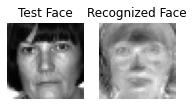

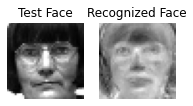

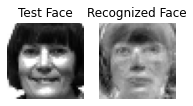

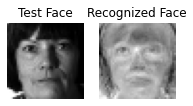

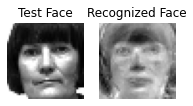

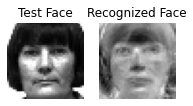

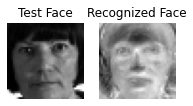

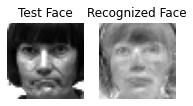

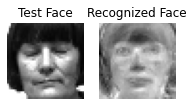

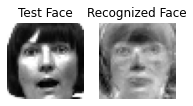

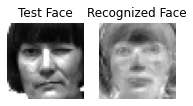

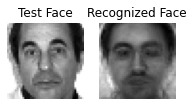

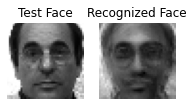

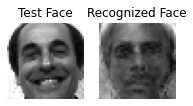

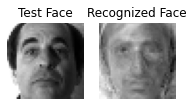

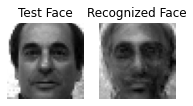

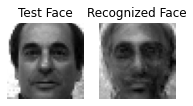

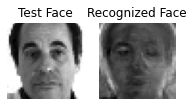

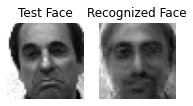

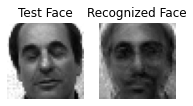

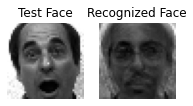

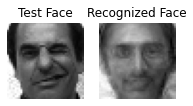

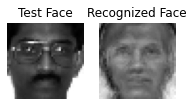

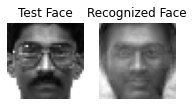

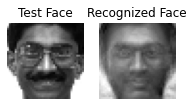

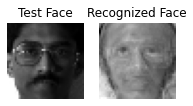

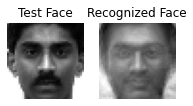

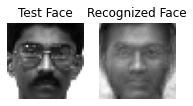

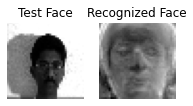

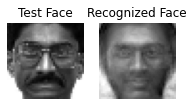

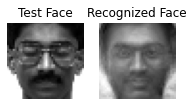

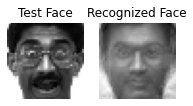

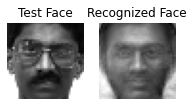

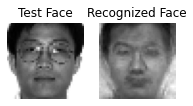

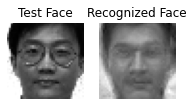

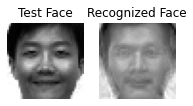

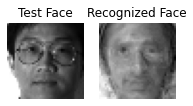

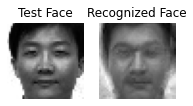

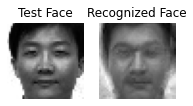

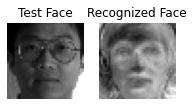

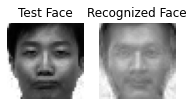

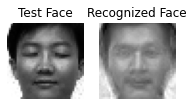

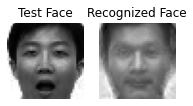

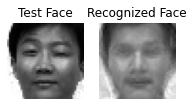

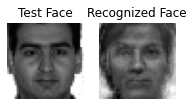

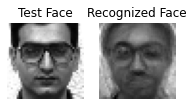

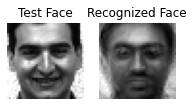

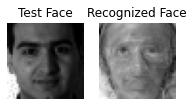

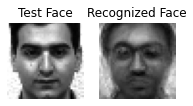

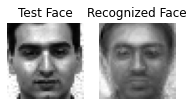

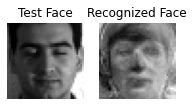

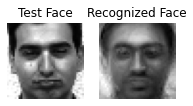

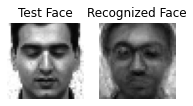

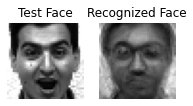

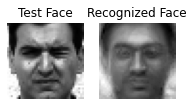

In [49]:
#Task 3
test_images = images
def Project(k,zero_mean_test,threshold):
    matrixU = np.zeros((1600,k))
    c =0
    for val in range(k-1,-1,-1):
        matrixU[:,c] = u_list[val].flatten()
        c = c+1
    w = np.dot(np.transpose(matrixU) ,np.transpose(zero_mean_test))
    original_w_k =dict[k]
    dist =[]
    for wt_vectors in original_w_k:
        dist.append(np.linalg.norm(wt_vectors-w.T))

    nearest_face = np.argmin(dist)
    nearest_face_weights = original_w_k[nearest_face]
    fig1, axes_array = plt.subplots(1, 2)
    fig1.set_size_inches(3,3)
    zero_mean_test =zero_mean_test + np.transpose(mean)
    zero_mean_test = zero_mean_test.reshape(40,40)
    image_plot = axes_array[0].imshow(zero_mean_test,cmap=plt.cm.gray)
    axes_array[0].axis('off')
    axes_array[0].set(title='Test Face')

    face = np.dot(nearest_face_weights, np.transpose(matrixU))
    face = face+np.transpose(mean)
    reshape_face = face.reshape(40,40)
    if np.min(dist)<threshold:  #Nonface
        image_plot = axes_array[1].imshow(reshape_face,cmap=plt.cm.gray)
    axes_array[1].axis('off')
    axes_array[1].set(title ='Recognized Face')
    plt.show()
    
def runs(k):
    for num in range(0,len(test_images)):#t in test_images:
        t = test_images[num]
        test = t.flatten()
        zero_mean_test = test-np.transpose(mean)
        Project(k,zero_mean_test,80)  #threshold =80

runs(2)
print('\t\tk=5')
runs(5)
print('\t\tk=15')
runs(15)

KeyboardInterrupt: 

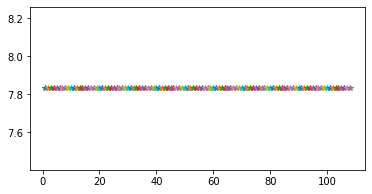

In [50]:
#Task 4
def Error(k,threshold):
    Nonfaces = 13
    total_images = 166
    nf_detected = 0
    matrixU = np.zeros((1600,k))
    c =0
    for val in range(k-1,-1,-1):
        matrixU[:,c] = u_list[val].flatten()
        c = c+1
    for t in test_images:
        test = t.flatten()
        zero_mean_test = test-np.transpose(mean)
        w = np.dot(np.transpose(matrixU) ,np.transpose(zero_mean_test))
        original_w_k =dict[k]
        dist =[]
        for wt_vectors in original_w_k:
            dist.append(np.linalg.norm(wt_vectors-w.T))
        if np.min(dist) >threshold:
            nf_detected = nf_detected+1
    error_percentage = ((Nonfaces - nf_detected)/total_images)*100
    return error_percentage

xt =[]
for x in range(1,167):
    Reconstruct(x,False)
    xt.append(x)
#print(x)
#xt=[2,5,15]


fig, axes1 = plt.subplots(1, 1)
fig.set_size_inches(6,3)
for x_pts in xt:
    y= Error(x_pts,80)
    axes1.plot(x_pts, y,marker='*')
axes1.set(xlabel="k",ylabel="% error rate",ylim=(0,100),xlim=(0,166))
plt.grid(True)
plt.show()
